In [44]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import seaborn as sns  # Statistical data visualization
import plotly.express as px
import matplotlib.pyplot as plt  # Plotting and visualization
from IPython.display import display, HTML  # Displaying HTML output in Jupyter notebooks
import warnings  # Suppress warnings
from colorama import Fore, Style  # Colored terminal text

# Import classification models from sklearn
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier

# Import LightGBM classifier
from lightgbm import LGBMClassifier  # LightGBM Classifier

from sklearn.model_selection import GridSearchCV, train_test_split  # Model selection and hyperparameter tuning
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer  # Data scaling and transformation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Model evaluation metrics

warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarning messages
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [45]:
meta_food = pd.read_csv('onlinefoods.csv')

In [46]:
meta_food.rename(columns={'Output': 'state_of_order'},inplace=True)

In [47]:
meta_food = meta_food.drop('Unnamed: 12',axis=1)

In [48]:
def styled_heading(text, background_color='#14adc6', text_color='white'):
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        font-family: 'Montserrat', sans-serif;
        color: {text_color};
        padding: 15px;
        font-size: 30px;
        font-weight: bold;
        line-height: 1;
        border-radius: 20px 20px 0 0;
        margin-bottom: 20px;
        box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);
        border: 3px dashed {background_color};
    ">
        {text}
    </div>
    """

def style_table(df):
    styled_df = df.style.set_table_styles([
        {"selector": "th", "props": [("color", "white"), ("background-color", "#14adc6")]}
    ]).set_properties(**{"text-align": "center"}).hide(axis="index")
    return styled_df.to_html()

def print_dataset_analysis(train_dataset, n_top=5, heading_color='#14adc6', text_color='white'):
    train_heading = styled_heading(f"🔝 Top {n_top} rows of Dataset", heading_color, text_color)
    display(HTML(train_heading))
    display(HTML(style_table(train_dataset.head(n_top))))

    summary_heading = styled_heading("📊 Summary of Dataset", heading_color, text_color)
    display(HTML(summary_heading))
    display(HTML(style_table(train_dataset.describe())))

    null_heading = styled_heading("❌ Null Values in Dataset", heading_color, text_color)
    train_null_count = train_dataset.isnull().sum()
    display(HTML(null_heading))
    if train_null_count.sum() == 0:
        display(HTML("<p>No null values in the training dataset.</p>"))
    else:
        display(HTML("<h3>Training Dataset:</h3>"))
        display(HTML(style_table(train_null_count[train_null_count > 0].to_frame())))
        display(HTML("<p>These are the null values.</p>"))

    duplicate_heading = styled_heading("♻️ Duplicate Values in Dataset", heading_color, text_color)
    train_duplicates = train_dataset.duplicated().sum()
    display(HTML(duplicate_heading))
    display(HTML("<h3>Training Dataset:</h3>"))
    display(HTML(f"<p>{train_duplicates} duplicate rows found.</p>"))

    shape_heading = styled_heading("📏 Number of Rows and Columns", heading_color, text_color)
    display(HTML(shape_heading))
    display(HTML("<h3>Training Dataset:</h3>"))
    display(HTML(f"<p>Rows: {train_dataset.shape[0]}, Columns: {train_dataset.shape[1]}</p>"))

def print_unique_values(train_dataset, heading_color='#14adc6', text_color='white'):
    unique_values_heading = styled_heading("🔢 Unique Values in Dataset", heading_color, text_color)
    display(HTML(unique_values_heading))
    unique_values_table = pd.DataFrame({
        'Column Name': train_dataset.columns,
        'Data Type': [train_dataset[col].dtype for col in train_dataset.columns],
        'Unique Values': [', '.join(map(str, train_dataset[col].unique()[:7])) for col in train_dataset.columns]
    })
    display(HTML(style_table(unique_values_table)))

# Example usage with `meta_food`
print_dataset_analysis(meta_food, n_top=5, heading_color='#14adc6', text_color='white')
print_unique_values(meta_food, heading_color='#14adc6', text_color='white')

Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,state_of_order,Feedback
20,Female,Single,Student,No Income,Post Graduate,4,12.976600,77.599300,560001,Yes,Positive
24,Female,Single,Student,Below Rs.10000,Graduate,3,12.977000,77.577300,560009,Yes,Positive
22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.955100,77.659300,560017,Yes,Negative
22,Female,Single,Student,No Income,Graduate,6,12.947300,77.561600,560019,Yes,Positive
22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.985000,77.553300,560010,Yes,Positive


Age,Family size,latitude,longitude,Pin code
388.000000,388.000000,388.000000,388.000000,388.000000
24.628866,3.280928,12.972058,77.600160,560040.113402
2.975593,1.351025,0.044489,0.051354,31.399609
18.000000,1.000000,12.865200,77.484200,560001.000000
23.000000,2.000000,12.936900,77.565275,560010.750000
24.000000,3.000000,12.977000,77.592100,560033.500000
26.000000,4.000000,12.997025,77.630900,560068.000000
33.000000,6.000000,13.102000,77.758200,560109.000000


Column Name,Data Type,Unique Values
Age,int64,"20, 24, 22, 27, 23, 21, 28"
Gender,object,"Female, Male"
Marital Status,object,"Single, Married, Prefer not to say"
Occupation,object,"Student, Employee, Self Employeed, House wife"
Monthly Income,object,"No Income, Below Rs.10000, More than 50000, 10001 to 25000, 25001 to 50000"
Educational Qualifications,object,"Post Graduate, Graduate, Ph.D, Uneducated, School"
Family size,int64,"4, 3, 6, 2, 5, 1"
latitude,float64,"12.9766, 12.977, 12.9551, 12.9473, 12.985, 12.9299, 12.9828"
longitude,float64,"77.5993, 77.5773, 77.6593, 77.5616, 77.5533, 77.6848, 77.6131"
Pin code,int64,"560001, 560009, 560017, 560019, 560010, 560103, 560042"


In [49]:
meta_food['Monthly Income'] = meta_food['Monthly Income'].str.replace('.', '', regex=False)

In [50]:
meta_food['Educational Qualifications'] = meta_food['Educational Qualifications'].str.replace('.', '', regex=False)

In [51]:
meta_food = meta_food.drop_duplicates()

In [52]:
meta_food.shape

(285, 12)

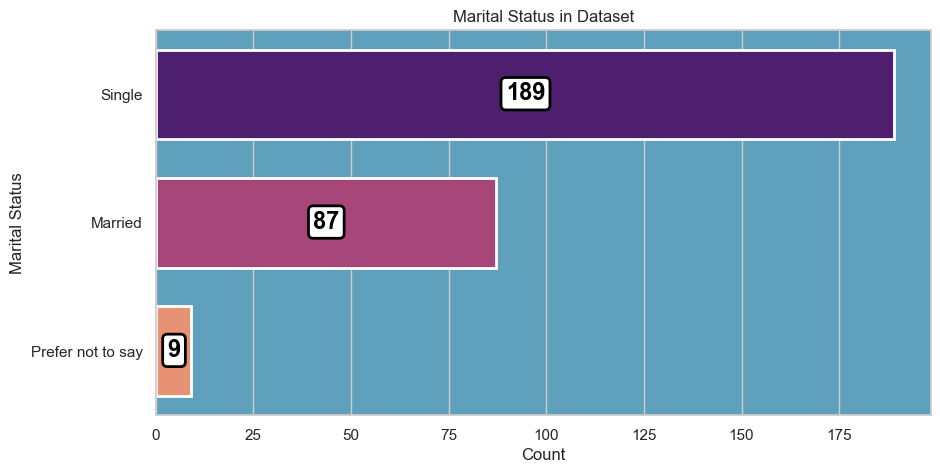

In [53]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Marital Status", data=meta_food, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Marital Status in Dataset")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.show()

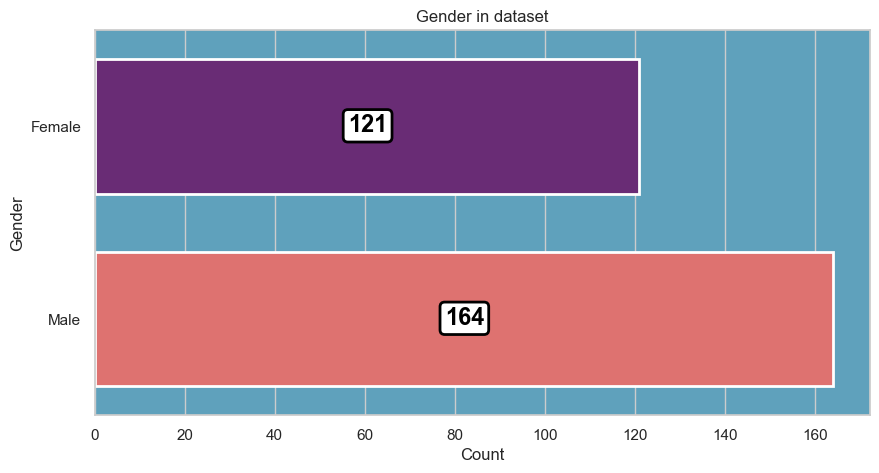

In [54]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Gender", data=meta_food, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Gender in dataset")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

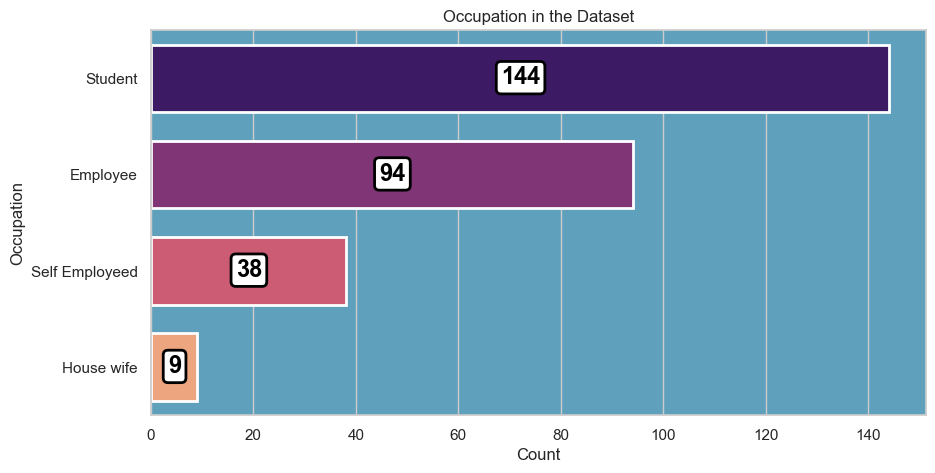

In [55]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Occupation", data=meta_food, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Occupation in the Dataset")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()

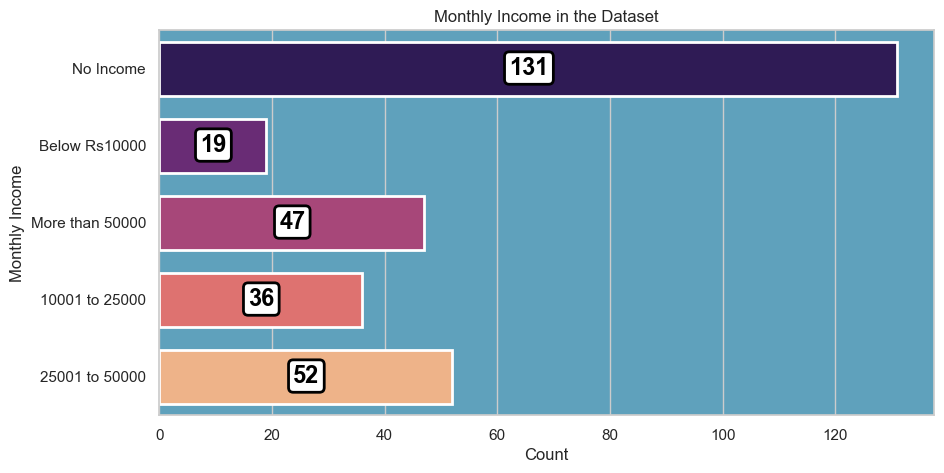

In [56]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Monthly Income", data=meta_food, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Monthly Income in the Dataset")
plt.xlabel("Count")
plt.ylabel("Monthly Income")
plt.show()

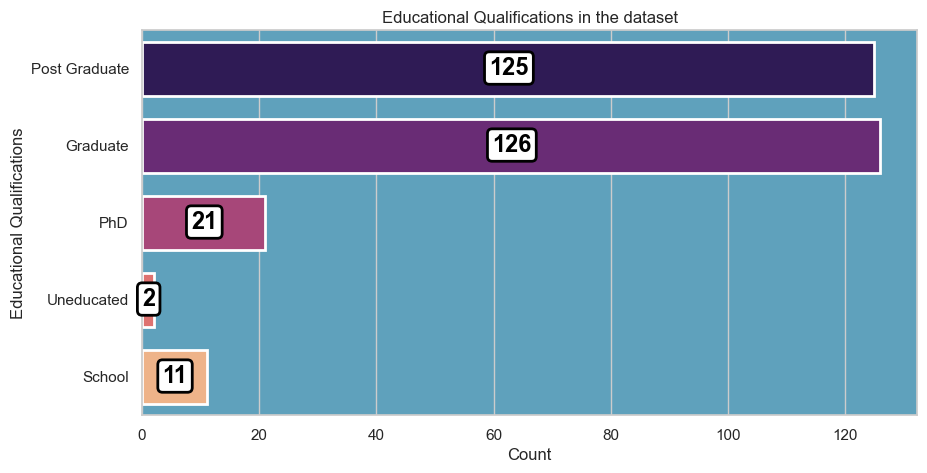

In [57]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Educational Qualifications", data=meta_food, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Educational Qualifications in the dataset")
plt.xlabel("Count")
plt.ylabel("Educational Qualifications")
plt.show()

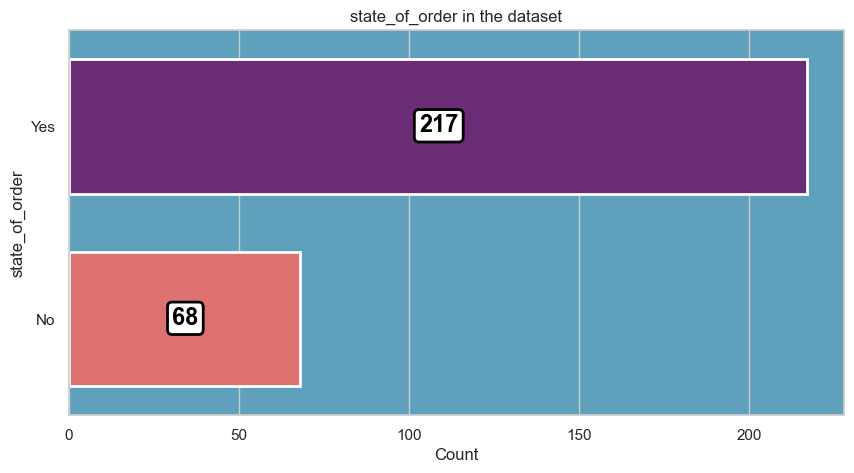

In [58]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.countplot(y="state_of_order", data=meta_food, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("state_of_order in the dataset")
plt.xlabel("Count")
plt.ylabel("state_of_order")
plt.show()

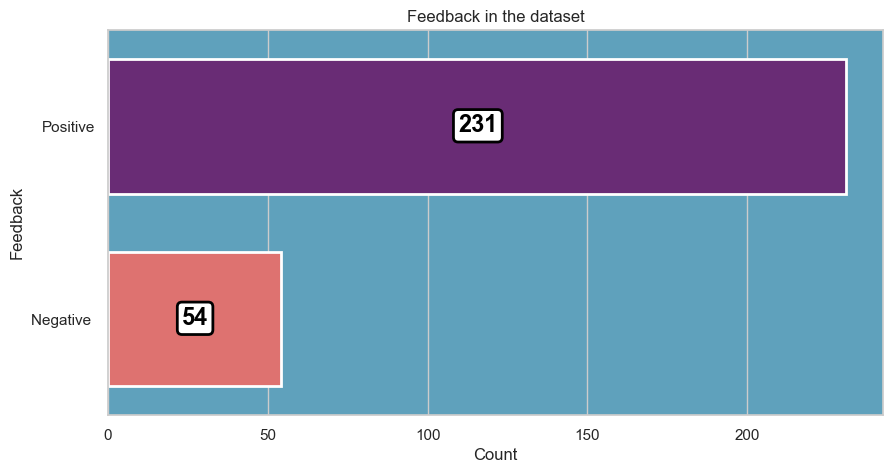

In [59]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Feedback", data=meta_food, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Feedback in the dataset")
plt.xlabel("Count")
plt.ylabel("Feedback")
plt.show()

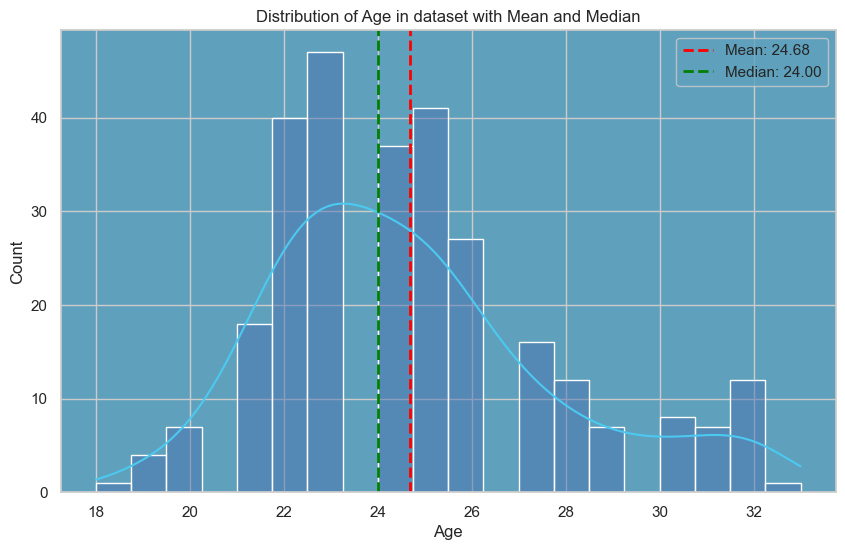

In [60]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#5fa1bc"})
cmap = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=meta_food, x="Age", bins=20, palette=cmap, edgecolor='white', kde=True)
histplot.get_lines()[0].set_color("#4cc9f0")
mean_value = meta_food["Age"].mean()
median_value = meta_food["Age"].median()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.title("Distribution of Age in dataset with Mean and Median")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

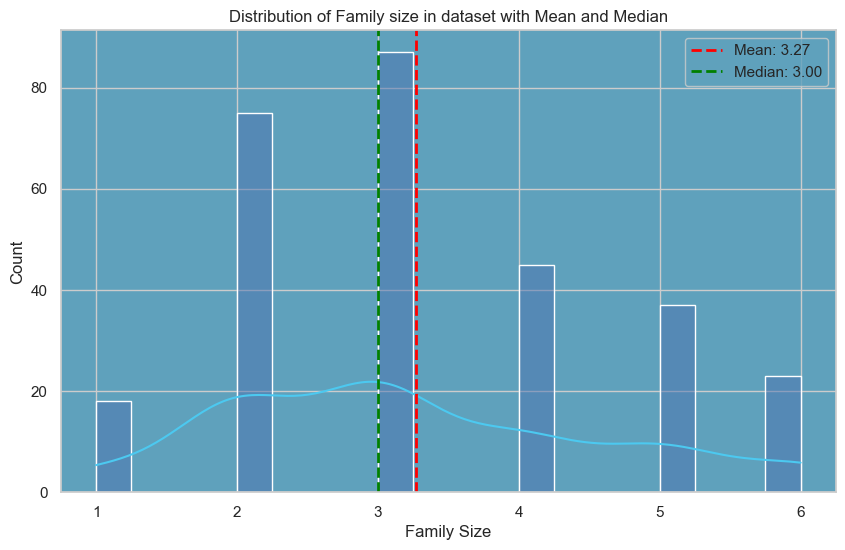

In [61]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#5fa1bc"})
cmap = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=meta_food, x="Family size", bins=20, palette=cmap, edgecolor='white', kde=True)
histplot.get_lines()[0].set_color("#4cc9f0")
mean_value = meta_food["Family size"].mean()
median_value = meta_food["Family size"].median()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.title("Distribution of Family size in dataset with Mean and Median")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.legend()
plt.show()

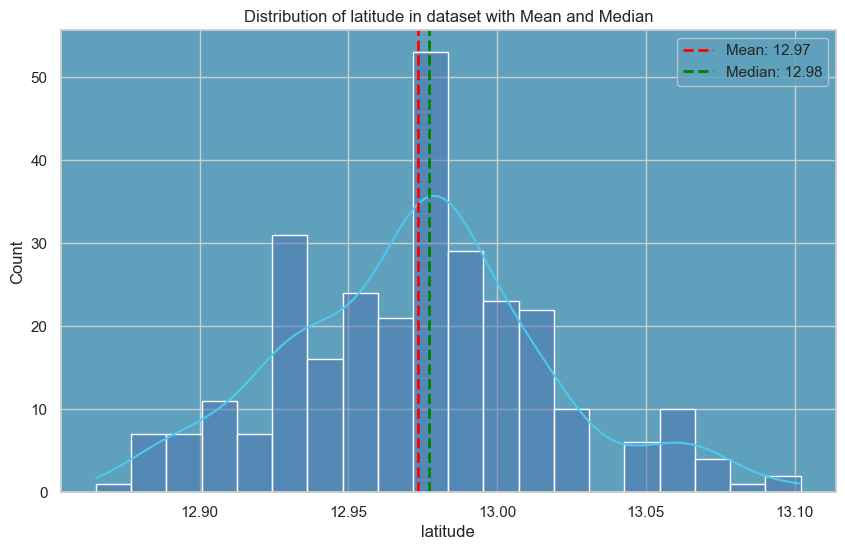

In [62]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#5fa1bc"})
cmap = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=meta_food, x="latitude", bins=20, palette=cmap, edgecolor='white', kde=True)
histplot.get_lines()[0].set_color("#4cc9f0")
mean_value = meta_food["latitude"].mean()
median_value = meta_food["latitude"].median()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.title("Distribution of latitude in dataset with Mean and Median")
plt.xlabel("latitude")
plt.ylabel("Count")
plt.legend()
plt.show()

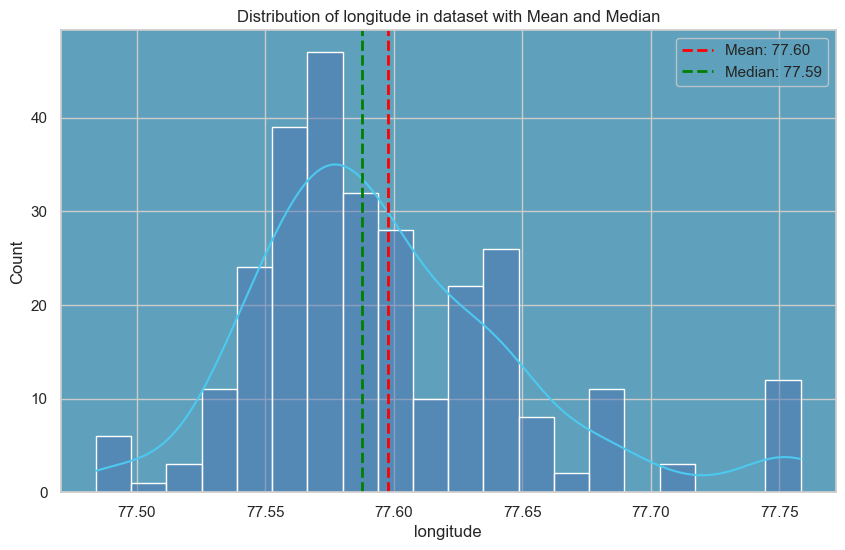

In [63]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#5fa1bc"})
cmap = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=meta_food, x="longitude", bins=20, palette=cmap, edgecolor='white', kde=True)
histplot.get_lines()[0].set_color("#4cc9f0")
mean_value = meta_food["longitude"].mean()
median_value = meta_food["longitude"].median()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.title("Distribution of longitude in dataset with Mean and Median")
plt.xlabel("longitude")
plt.ylabel("Count")
plt.legend()
plt.show()

In [64]:
fig = px.scatter_geo(
    meta_food, 
    lat='latitude', 
    lon='longitude', 
    text='Pin code', 
    title='Geographical Chart with Pincodes'
)

# Show the plot
fig.show()